# Story behind..
There has been a revenue decline for the bank and they would like to know what actions to take. After investigation, it was found that the root cause is that their clients are not depositing as frequently as before. Term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can lend more and thus make more profits. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues.

You are provided a dataset containing details of marketing campaigns done via phone with various details for customers such as demographics, last campaign details etc. Can you help the bank to predict accurately whether the customer **will subscribe** to the focus product for the campaign - Term Deposit after the campaign?

<html>
    <body>
        <img src='https://www.passionateinmarketing.com/wp-content/uploads/2020/07/campaign-blog-graphic-01-1080x675.jpg'><br>
    </body>
</html>

**Variables:**
1. idUnique  -                           
identifier for each sample in the dataset. Cannot be used for modelling
2. customer_age	-                        
Age of the Customer in years
3. job_type	   -                         
Type of job of the customer
4. marital	  -                          
Marital Status of the Custmer
5. education	-                        
Education Level of the Customer
6. default	Whether    -                 
customer has Defaulted in Past
7. balance	Current    -                 
Balance in the Customer's Bank
8. housing_loan	       -                 
Has customer taken a Housing Loan
9. personal_loan	    -                
Has customer taken a Personal Loan
10. communication_type	  -              
Type of communication made by the bank with the customer
11. day_of_month	      -              
Day of month of the last contact made with customer
12. month	               -             
Month for the last contact made with customer
13. last_contact_duration	-            
Last Contact duration made with the customer (in seconds)
14. num_contacts_in_campaign -           
Number of contacts made with the customer during the current campaign.
15. days_since_prev_campaign_contact -	
Number of days passed since customer was contacted in previous campaign.
16. num_contacts_prev_campaign       -   
Number of contacts made with the customer
during the previous campaign.
17. prev_campaign_outcome	          -  
Success or Failure in previous Campaign.
18. term_deposit_subscribed	(Target)   - 
Has the customer taken a term deposit ?

**Agenda:**
1. Brief look at data
2. Data shape
3. Traget distribution
4. Variable datatypes
5. Null values
6. Unique values
7. Separating categorical ans numerical columns
8. Univariate analysis of Categorical features
9. Bivariate analysis of Categorical features
10. Univariate analysis of Numerical features
11. Bivariate analysis of Numerical features

**Let's begin**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/avguided-community-hackathon2020term-deposit/Train_eP48B9k.csv')
test = pd.read_csv('../input/avguided-community-hackathon2020term-deposit/Test_jPKyvmK.csv')

# Brief look at data

In [3]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [4]:
test.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


# Dataset shape

In [5]:
id_col, target_col = 'id', 'term_deposit_subscribed'

In [6]:
print('Train contains',train.shape[0],'samples and ',train.shape[1],'variables')
print('Test contains',test.shape[0],'samples and ',test.shape[1],'variables')

features = [c for c in train.columns if c not in [id_col, target_col]]
print('There are',len(features),'number of features')

Train contains 31647 samples and  18 variables
Test contains 13564 samples and  17 variables
There are 16 number of features


# Traget distribution

In [7]:
#Normalize the data to get ratio instead of raw count
train[target_col].value_counts(normalize=True)

0    0.892754
1    0.107246
Name: term_deposit_subscribed, dtype: float64

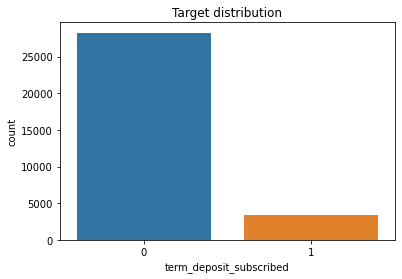

In [8]:
sns.countplot(train[target_col])
plt.title('Target distribution')
plt.show()

More than 25,000 have not subscribet to the term deposit which is 89% and only 10% have subscribed.

# Variable datatypes

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

We have large number of categorical values and few numerical values. We will analyse them separately in later stage.

# Null values

In [10]:
null_value_percentage = (train.isnull().sum()/train.shape[0])*100
null_value_percentage.sort_values(ascending = False)

days_since_prev_campaign_contact    81.622271
customer_age                         1.955952
balance                              1.260783
last_contact_duration                0.982716
marital                              0.473979
personal_loan                        0.470819
num_contacts_in_campaign             0.353904
job_type                             0.000000
education                            0.000000
default                              0.000000
term_deposit_subscribed              0.000000
housing_loan                         0.000000
prev_campaign_outcome                0.000000
communication_type                   0.000000
day_of_month                         0.000000
month                                0.000000
num_contacts_prev_campaign           0.000000
id                                   0.000000
dtype: float64

days_since_prev_campaign_contact has 81% missing data. The reason might be that these customers were never reached during previous campaign. Remaining variables habe very small percentage of missing values which will not matter much.

# Unique values

In [11]:
train.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

There are lot of unique values. day_of_month has 31 unique valus which is obvious and months as 12.

# Separating categorical and numerical columns

In [12]:
#looping through the columns
#check if datatype is object('O')
#if yes add to list
cat_cols = [train.columns[i] 
            for i in range(1, train.shape[1]-1)  
            if train.iloc[:,i].dtype=='O']
cat_cols

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

In [13]:
num_cols = [c for c in features if c not in cat_cols]
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

# Univariate analysis of Categorical features
Pick one variable one at a time and analyse individually like frequency, distribution etc.

**1. Pie chart to see propotion of samples**

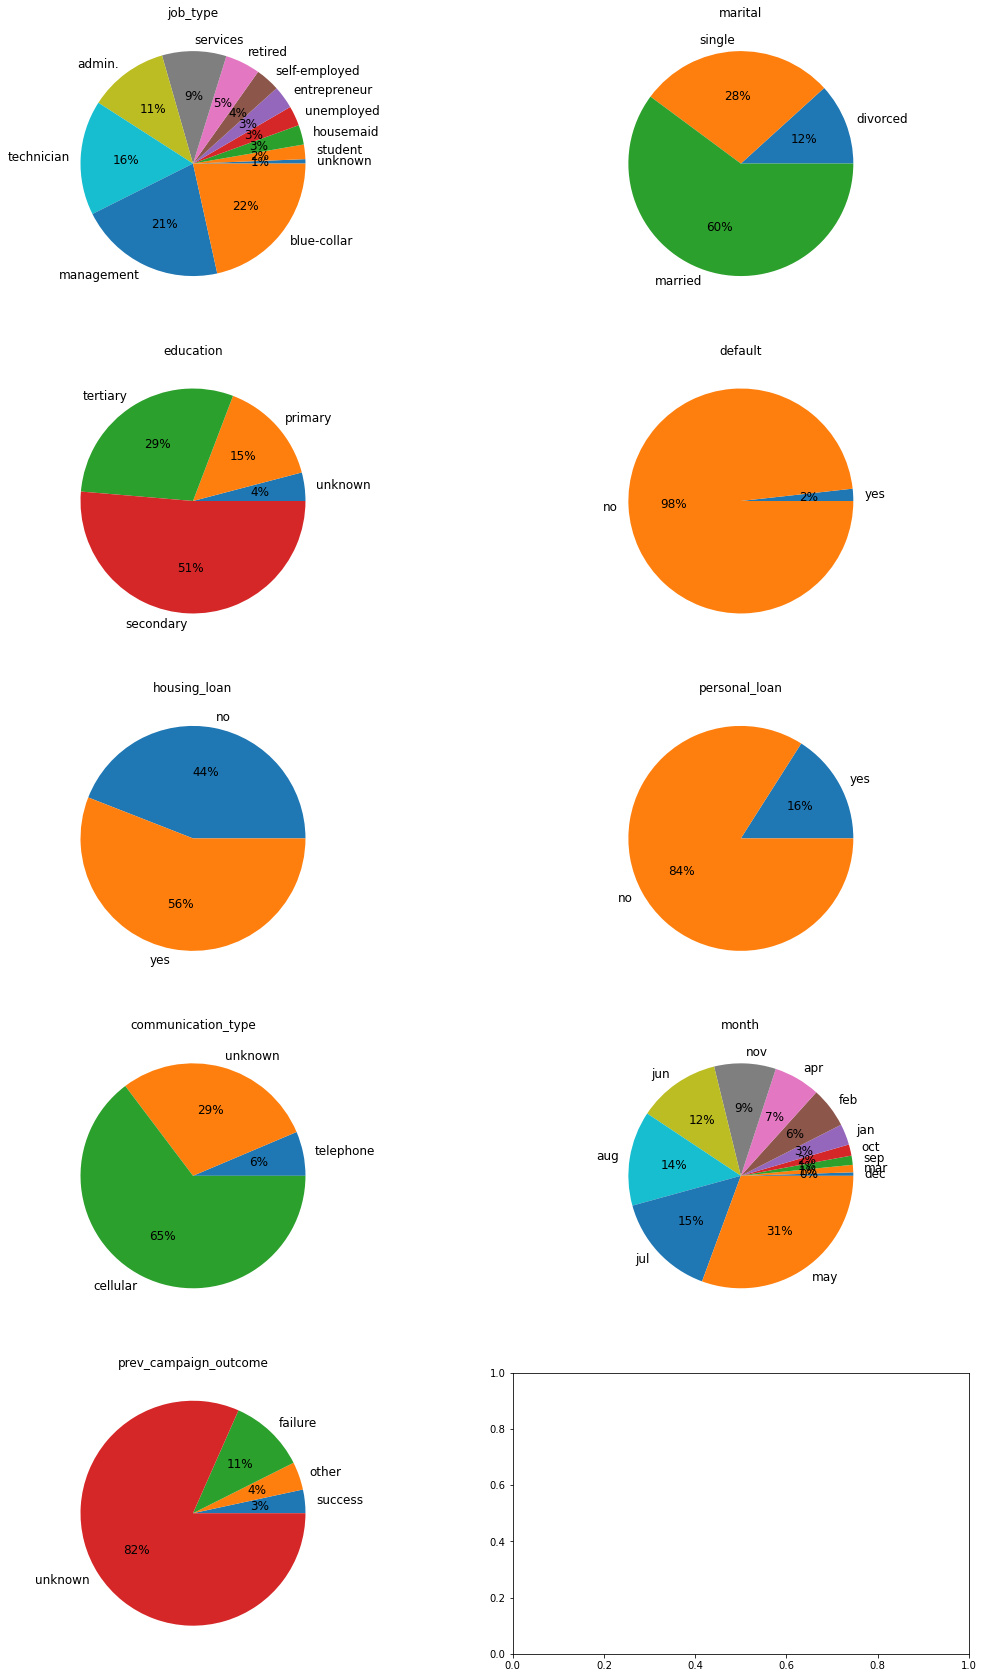

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(18,30))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(train[cat_cols]):
    train[c].value_counts()[::-1].plot(kind='pie',
                                          ax=axes[i],
                                          title=c,
                                          autopct='%.0f%%',
                                          fontsize=12)
    axes[i].set_ylabel('')

**2. Bar plot to see frequency**

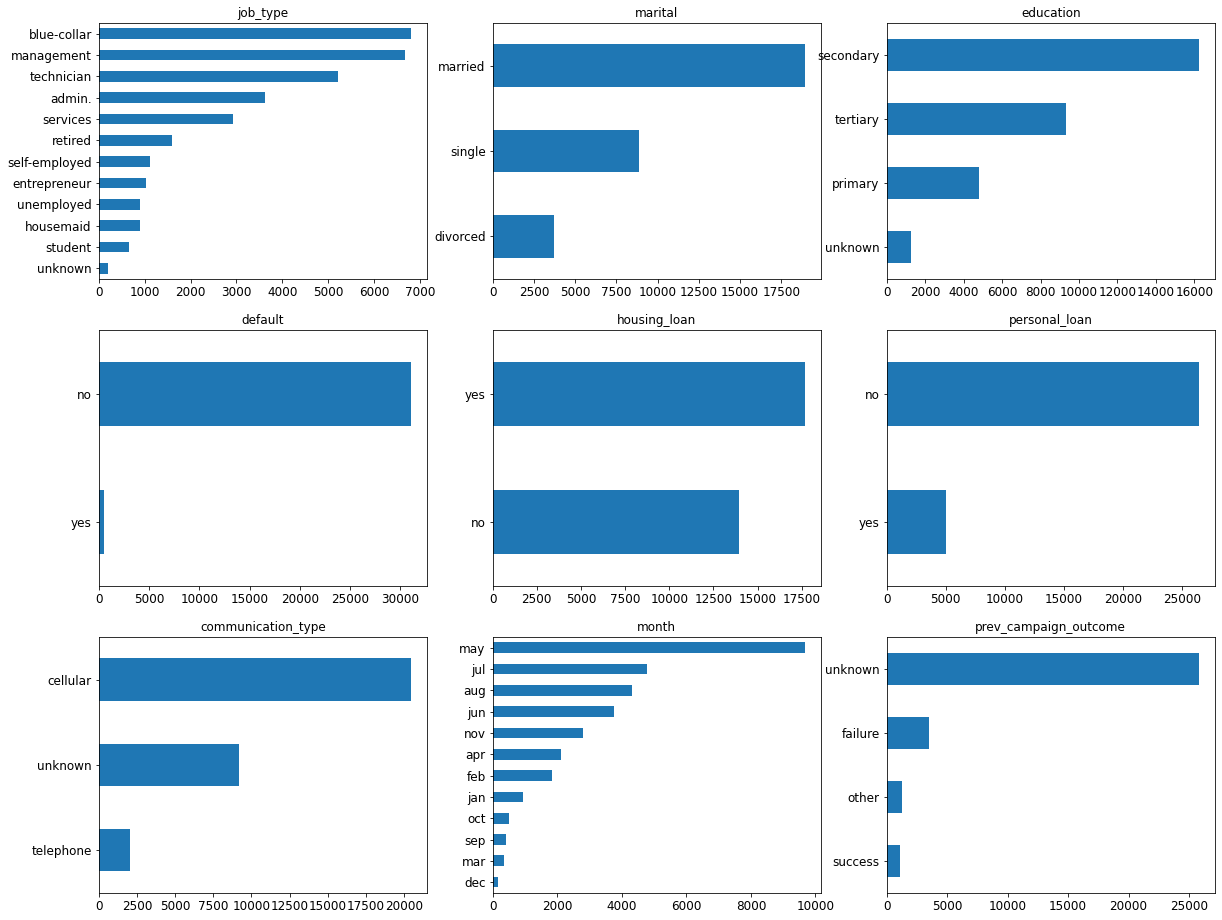

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(20,16))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(train[cat_cols]):
    train[c].value_counts()[::-1].plot(kind='barh',
                                          ax=axes[i],
                                          title=c,
                                          fontsize=12)

**Observations**
1. Less number of students and more number of management and technician customers
2. Most of married customers
3. Most customers education levels is secondary
4. Most cutomers are not defaulted in past
5. More than 50% have taken housing loan
6. Nearly 85% have taken personal loan
7. Major communication type is cellular
8. Most of the customers were last contacted in the month of May
9. Most customers where not contacted in previous month

# Bivariate analysis of Categorical features
Check relationship of each variable with the target variable.

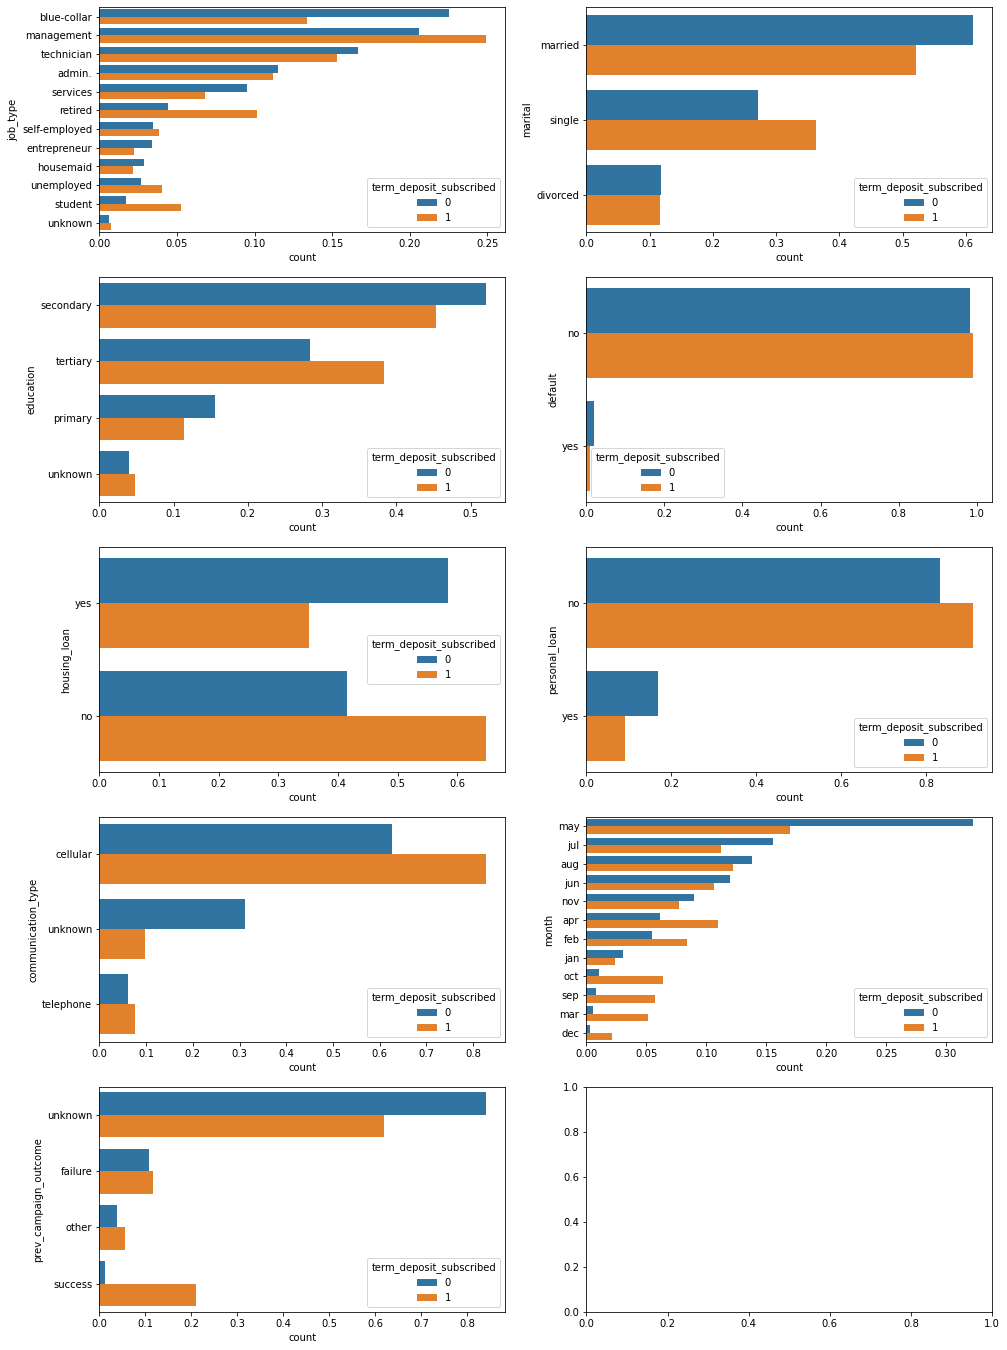

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(16,24))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(train[cat_cols]):
    #index of rows where target_col value is 0
    fltr = train[target_col]==0
    
    #dataframe conraining rows and columns where target_col value is 0
    #fltr-index of rows where target_col value is 0
    #c-column name
    #taking the value count
    #resetting index as column name
    vc_a=train[fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)
    
    #dataframe conraining rows and columns where target_col value is 1
    vc_b=train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'}, axis=1)
    
    #setting target_col value to 0 and 1 respectively
    vc_a[target_col]=0
    vc_b[target_col]=1
    
    #combining into single dataframe
    df = pd.concat([vc_a, vc_b]).reset_index(drop=True)
    
    #plotting
    sns.barplot(y=c, x='count', data=df, hue=target_col, ax=axes[i])
    

**Observations**
1. Management, retire, self-employed, unemployed and students tend to subscribe more
2. Singles subscribe more than married and divorced
3. Customers with tertiary level of education will subscribe
4. Customers with without housing and personal load tend to subscribe to team deposit
5. Customers approached by cellular communication have subscribed 
6. Subscription rate is more during start(jan,feb,march,apr) and end of the year(oct,sept,dec)
7. Customers who subscribed during previous campaign tend to subscribe more

Printing vc_a, vc_b and df for your understanding

In [17]:
vc_a

,prev_campaign_outcome,count,term_deposit_subscribed
0,unknown,0.839946,0
1,failure,0.108944,0
2,other,0.038438,0
3,success,0.012671,0


In [18]:
vc_b

,prev_campaign_outcome,count,term_deposit_subscribed
0,unknown,0.619328,1
1,success,0.209782,1
2,failure,0.116087,1
3,other,0.054803,1


In [19]:
df

,prev_campaign_outcome,count,term_deposit_subscribed
0,unknown,0.839946,0
1,failure,0.108944,0
2,other,0.038438,0
3,success,0.012671,0
4,unknown,0.619328,1
5,success,0.209782,1
6,failure,0.116087,1
7,other,0.054803,1


# Univariate analysis of Numerical features

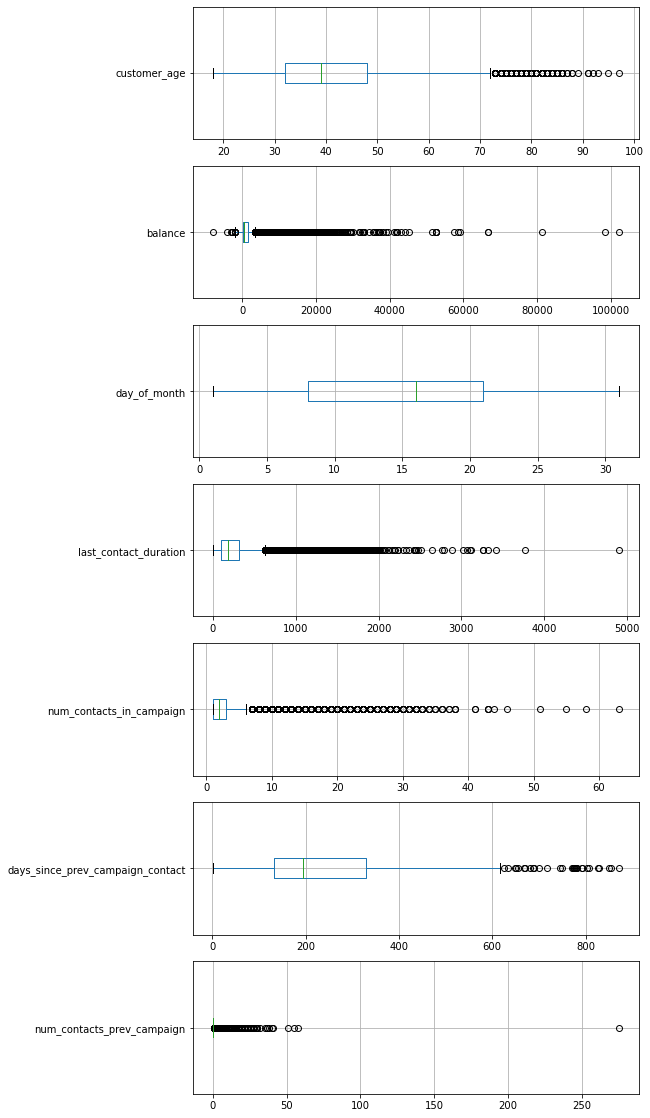

In [20]:
fig, axes = plt.subplots(7,1,figsize=(8,20))
for i,c in enumerate(train[num_cols]):
    train[[c]].boxplot(ax=axes[i], vert=False)

We can see many of the features have lot of outliers. Let's see distrubution

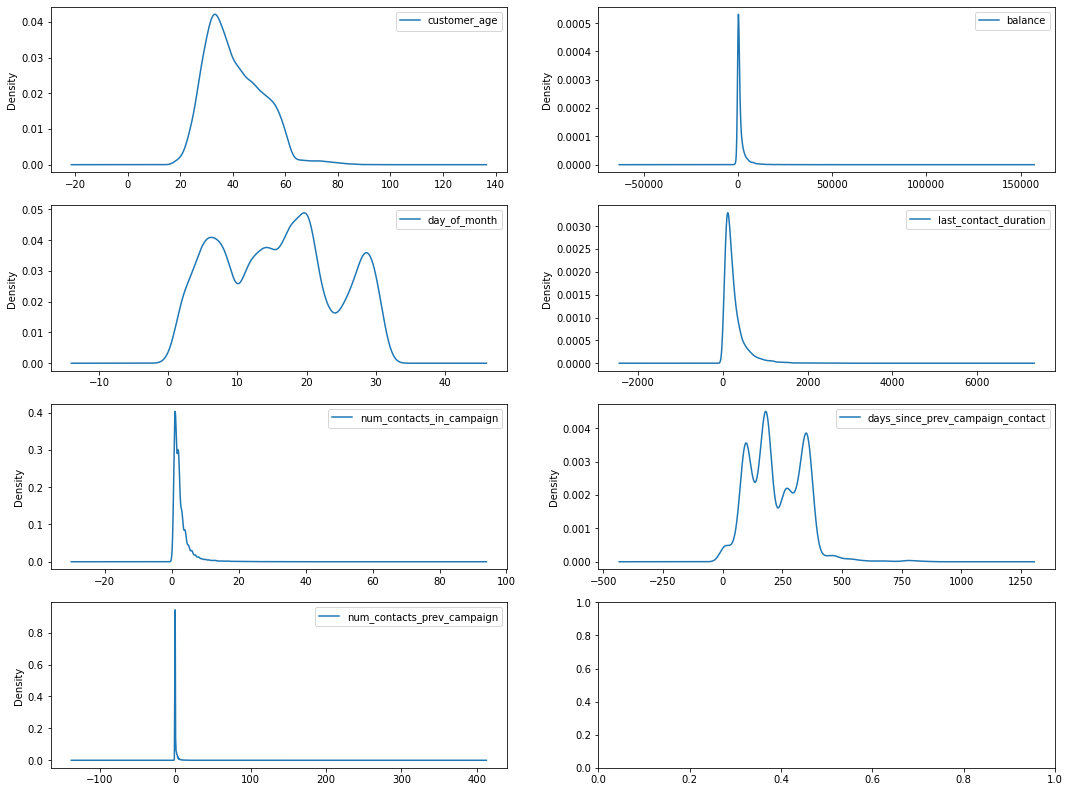

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(18,14))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(num_cols):
    plot = train[[c]].plot(kind='kde', ax=axes[i])

**Observations**
1. Most of the customers lie between age of 20 and 60
2. Big campaing happened roughly 180 and 365 days ago

# Bivariate analysis of Numerical features

Let us plot median of the numerical values. Why not mean? because we have already seen there are many outliers and mean is very much influenced by outliers.

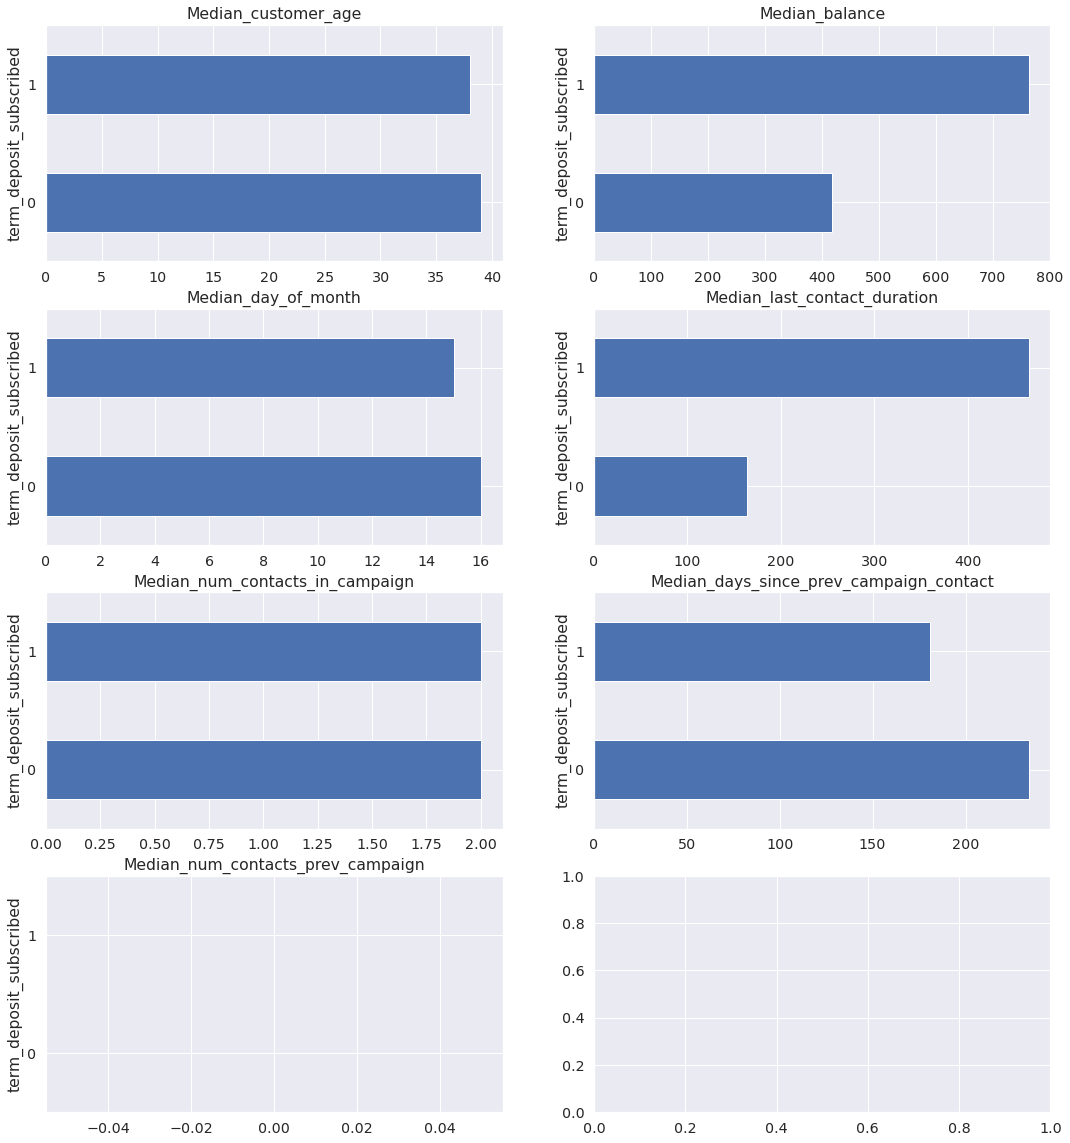

In [22]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(num_cols):
    train.groupby(target_col)[c].median().plot(kind = 'barh', title=f'Median_{c}', ax=axes[i])

**Observations**
1. Higher the bank balance more likely to subscribe
2. Higher the last contacted call duration more likely to subscribe

**Let's have closed look at customer age**

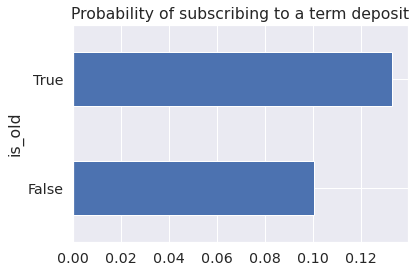

In [23]:
#create a new column called is_old and fill with true
train['is_old'] = True

#in each row see of age is less 50
#if yes make old_age value as False fo that row
train.loc[train['customer_age'] <= 50, 'is_old'] = False

#group by old_age and plot the count
_ = train.groupby('is_old')[target_col].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

Older people are more likely to take the term deposit subscription

In [24]:
#old_age column is no longer needed
train=train.drop(['is_old'],axis=1)

**Let's check corelation**

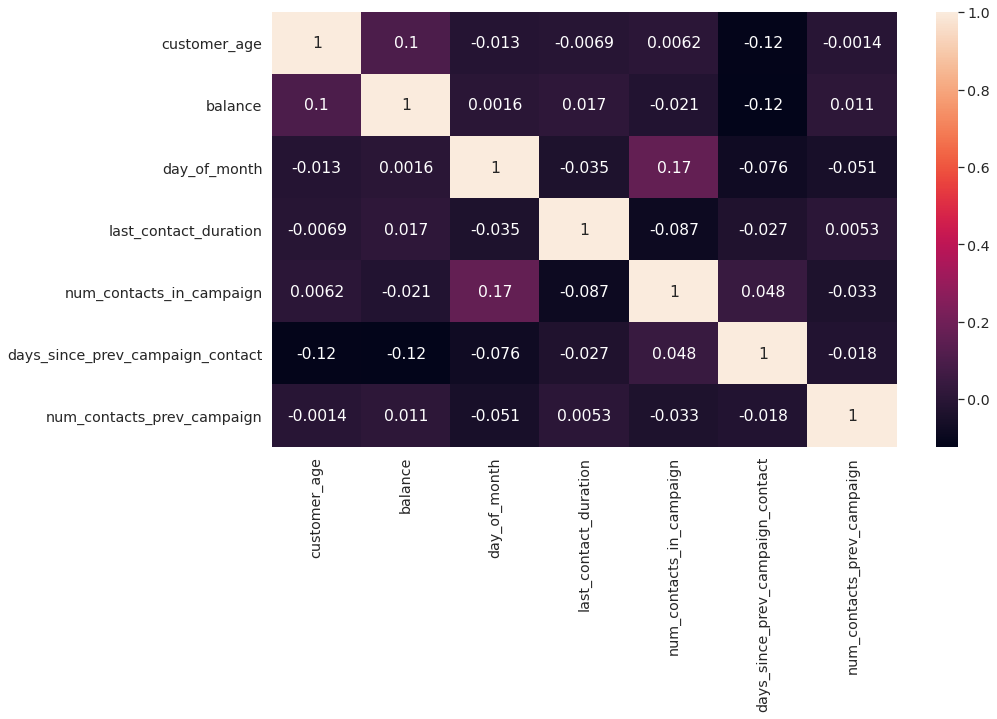

In [25]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

# Thank you